___
# PROJETO 1

## <font color='red'>Otavio Siaulys Cardoso</font>
___

## <font color='blue'>DESAPOSENTADOS</font>



## Introdução

Atualmente a econômia do Brasil está em crise. Altas taxas de desemprego e inflação afetam o país. Devido à esse estado muitos brasileiros estão buscando outras formas de arrecadar dinheiro, e segundo um artigo da Metal Revista, um desses meios eh o fato de que aposentados estão voltando ao mercado de trabalho.(link do artigo: http://metalrevista.com.br/2016/05/09/cresce-o-numero-de-aposentados-que-voltam-ao-mercado-de-trabalho-no-brasil/). Segundo o artigo, cerca de "6,645 milhões de idosos em todo o Brasil estavam em atividade entre abril e junho de 2015". Frente a este artigo, decidi comparar a renda dos aposentados que ainda trabalham em  2014 com os que não trabalham. Além disso outro objetivo desta analise é comparar a renda entre homens e mulheres que são aposentados e ainda trabalham; e entre brancos e pardos que são aposentados e ainda trabalham em 2014.


___
## Análise e Resultados dos dados de 2014

In [221]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [222]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
/Users/otaviocardoso/Desktop/Projeto 1 -CD


In [154]:
#Leitura da base já em formato de DataFrame e extensão .csv
dados = pd.read_table('PES2014.txt', sep=',')
dados2 = pd.read_table('PES2001.txt', sep=',')

In [223]:
n = dados.shape[0]
n2 = dados2.shape[0]

In [224]:
#Variáveis 2014
dados.IDADE = dados.V8005.astype('float')
dados.APOSENTADO = dados.V9122.astype('category')
dados.APOSENTADO.cat.categories=('Aposentado', 'Não aposentado')
dados.SEXO = dados.V0302.astype('category')
dados.SEXO.cat.categories=('Homens', 'Mulheres')
dados.COR_RACA = dados.V0404.astype('category')
dados.COR_RACA .cat.categories=('Indígena', 'Brancos', 'Preta', 'Amarela', 'Pardos', 'Sem declaração')
dados.RENDIMENTO_MENSAL = dados.V4722.astype('float')
dados.CASADO = dados.V4111.astype('category')
dados.CASADO.cat.categories=('Casado', 'Não casado atualmente', 'Nunca casou')
dados.TRABALHO = dados.V9001.astype('category')
dados.TRABALHO.cat.categories=('Sim', 'Não')

In [256]:
print('2014 - Frequência de aposentadoria:')
ut1= (dados.APOSENTADO.value_counts(True)*100).round(decimals=2)
print(ut1,'\n')
print('Tabela Cruzad:')
print('2014 - Frequência de aposentados que trabalham ou não:')
ut21 = (dados.TRABALHO[(dados.APOSENTADO=='Aposentado')].value_counts(True)*100).round(decimals=2)
print(ut21,'\n')

2014 - Frequência de aposentadoria:
Não aposentado    75.32
Aposentado        10.66
dtype: float64 

Tabela Cruzad:
2014 - Frequência de aposentados que trabalham ou não:
Não    78.64
Sim    21.36
dtype: float64 



In [226]:
print('2014 - Frequência de aposentadoria por sexo:')
ut2 = (dados.SEXO[(dados.APOSENTADO=='Aposentado')].value_counts(True)*100).round(decimals=2)
print(ut2,'\n')
print('2014 - Frequência de mulheres aposentadas que trabalham ou não:')
ut21 = (dados.TRABALHO[(dados.SEXO=='Mulheres')& (dados.APOSENTADO=='Aposentado')].value_counts(True)*100).round(decimals=2)
print(ut21,'\n')
print('2014 - Frequência de Homens aposentados que trabalham ou não:')
ut22 = (dados.TRABALHO[(dados.SEXO=='Homens')&(dados.APOSENTADO=='Aposentado')].value_counts(True)*100).round(decimals=2)
print(ut22,'\n')


2014 - Frequência de aposentadoria por sexo:
Mulheres    50.79
Homens      49.21
dtype: float64 

2014 - Frequência de mulheres aposentadas que trabalham ou não:
Não    84.41
Sim    15.59
dtype: float64 

2014 - Frequência de Homens aposentados que trabalham ou não:
Não    72.68
Sim    27.32
dtype: float64 



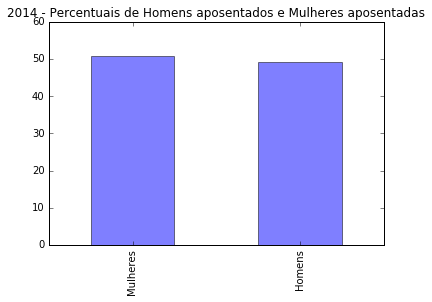

In [227]:
ut2.plot(kind='bar',title='2014 - Percentuais de Homens aposentados e Mulheres aposentadas',color=('b','b'), alpha = 0.5)

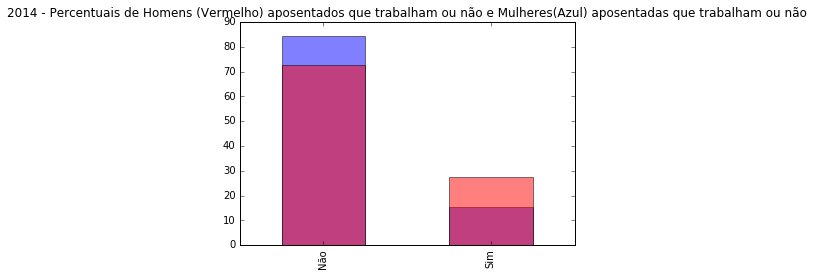

In [228]:
ut21.plot(kind='bar',color=('b','b'), alpha = 0.5)
ut22.plot(kind='bar',title='2014 - Percentuais de Homens (Vermelho) aposentados que trabalham ou não e Mulheres(Azul) aposentadas que trabalham ou não',color=('r','r'), alpha = 0.5)

In [229]:
print("2014 - rendimento mensal domiciliar de pessoas aposentados, casadas e trabalham")
a = dados.RENDIMENTO_MENSAL[(dados.RENDIMENTO_MENSAL <999999999999)&(dados.CASADO=='Casado') & (dados.APOSENTADO =='Aposentado') & (dados.TRABALHO== 'Sim')]
print(a.describe())
print()
print("2014 - rendimento mensal domiciliar de pessoas aposentadas, casadas e não trabalham")
b = dados.RENDIMENTO_MENSAL[(dados.RENDIMENTO_MENSAL <999999999999)&(dados.CASADO=='Casado') & (dados.APOSENTADO =='Aposentado') & (dados.TRABALHO== 'Não')]
print(b.describe())
print()

2014 - rendimento mensal domiciliar de pessoas aposentados, casadas e trabalham
count     5576.000000
mean      5536.237088
std       6401.215318
min        724.000000
25%       2048.000000
50%       3324.000000
75%       6255.000000
max      76000.000000
Name: V4722, dtype: float64

2014 - rendimento mensal domiciliar de pessoas aposentadas, casadas e não trabalham
count     16820.000000
mean       3466.230262
std        4236.957183
min         660.000000
25%        1448.000000
50%        2172.000000
75%        3700.000000
max      153000.000000
Name: V4722, dtype: float64



2014 - rendimento mensal domiciliar de pessoas aposentados, casados e trabalham


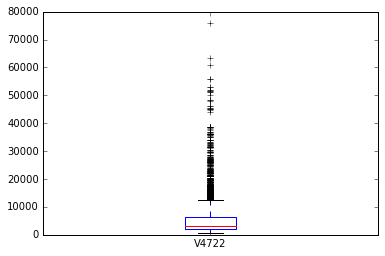

2014 - rendimento mensal domiciliar de pessoas aposentados, casados e não trabalham


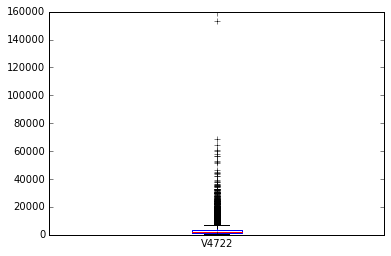

In [230]:
print("2014 - rendimento mensal domiciliar de pessoas aposentados, casados e trabalham")
a.plot (kind='box') 
plt.show()
print("2014 - rendimento mensal domiciliar de pessoas aposentados, casados e não trabalham")
b.plot (kind='box') 
plt.show()

2014 - Histograma que compara a renda (em faixas de 1 salário mínimo) entre aposentados que trabalham(azul) e aposentados que não trabalham(vermelho):


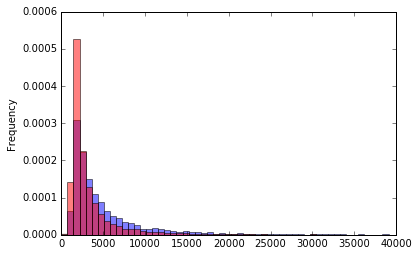

In [231]:
faixa0 = np.arange(0, 40000 , 724)
variávelCat0 = pd.cut(dados.RENDIMENTO_MENSAL[(dados.RENDIMENTO_MENSAL <999999999999)&(dados.CASADO=='Casado') & (dados.APOSENTADO == 'Aposentado')& (dados.TRABALHO== 'Sim')], faixa0) 
variávelCat0.value_counts()
faixa00 = np.arange(0, 40000, 724)
variávelCat00 = pd.cut(dados.RENDIMENTO_MENSAL[(dados.RENDIMENTO_MENSAL <999999999999)&(dados.CASADO=='Casado') & (dados.APOSENTADO == 'Aposentado')& (dados.TRABALHO== 'Não')], faixa00) 
variávelCat00.value_counts()
print("2014 - Histograma que compara a renda (em faixas de 1 salário mínimo) entre aposentados que trabalham(azul) e aposentados que não trabalham(vermelho):")
plot = dados.RENDIMENTO_MENSAL[(dados.RENDIMENTO_MENSAL <999999999999)&(dados.CASADO=='Casado') & (dados.APOSENTADO == 'Aposentado') & (dados.TRABALHO== 'Sim')].plot.hist(bins = faixa0, normed =1, alpha = 0.5, color = 'b')
plot = dados.RENDIMENTO_MENSAL[(dados.RENDIMENTO_MENSAL <999999999999)&(dados.CASADO=='Casado') & (dados.APOSENTADO == 'Aposentado') & (dados.TRABALHO== 'Não')].plot.hist(bins = faixa00, normed =1, alpha = 0.5, color = 'r')
plt.show()

In [232]:
print("2014 - rendimento mensal domiciliar de homens aposentados, casados e trabalham")
c = dados.RENDIMENTO_MENSAL[(dados.RENDIMENTO_MENSAL <999999999999)&(dados.CASADO=='Casado') & (dados.APOSENTADO =='Aposentado') & (dados.TRABALHO== 'Sim')& (dados.SEXO== 'Homens')]
print(a.describe())
print()
print("2014 - rendimento mensal domiciliar de mulheres aposentados, casadas e trabalham")
d = dados.RENDIMENTO_MENSAL[(dados.RENDIMENTO_MENSAL <999999999999)&(dados.CASADO=='Casado') & (dados.APOSENTADO =='Aposentado') & (dados.TRABALHO== 'Sim')& (dados.SEXO== 'Mulheres')]
print(b.describe())
print()

2014 - rendimento mensal domiciliar de homens aposentados, casados e trabalham
count     5576.000000
mean      5536.237088
std       6401.215318
min        724.000000
25%       2048.000000
50%       3324.000000
75%       6255.000000
max      76000.000000
Name: V4722, dtype: float64

2014 - rendimento mensal domiciliar de mulheres aposentados, casadas e trabalham
count     16820.000000
mean       3466.230262
std        4236.957183
min         660.000000
25%        1448.000000
50%        2172.000000
75%        3700.000000
max      153000.000000
Name: V4722, dtype: float64



2014 - rendimento mensal domiciliar de pessoas aposentadas, casadas e trabalham


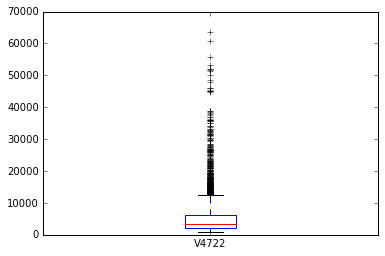

2014 - rendimento mensal domiciliar de pessoas aposentadas, casadas e não trabalham


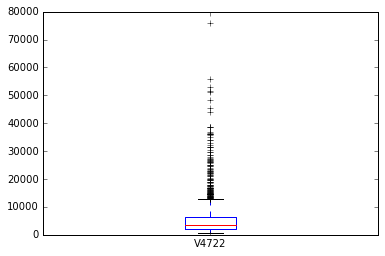

In [233]:
print("2014 - rendimento mensal domiciliar de pessoas aposentadas, casadas e trabalham")
c.plot (kind='box') 
plt.show()
print("2014 - rendimento mensal domiciliar de pessoas aposentadas, casadas e não trabalham")
d.plot (kind='box') 
plt.show()

2014 - Histograma que compara a renda entre homens aposentados e casados(azul) e mulheres aposentadas e casadas(vermelho):


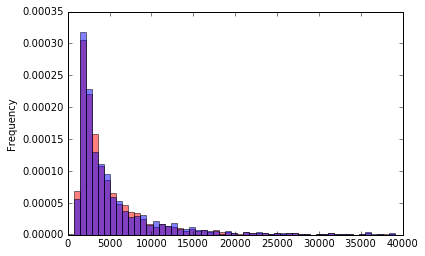

In [234]:
faixa = np.arange(0, 40000 , 724)
variávelCat = pd.cut(dados.RENDIMENTO_MENSAL[(dados.RENDIMENTO_MENSAL <999999999999)&(dados.CASADO=='Casado') & (dados.APOSENTADO == 'Aposentado') & (dados.SEXO == 'Homens') & (dados.TRABALHO== 'Sim')], faixa) 
variávelCat.value_counts()
faixa2 = np.arange(0, 40000, 724)
variávelCat2 = pd.cut(dados.RENDIMENTO_MENSAL[(dados.RENDIMENTO_MENSAL <999999999999)&(dados.CASADO=='Casado') & (dados.APOSENTADO == 'Aposentado') & (dados.SEXO == 'Mulheres') & (dados.TRABALHO== 'Sim')], faixa2) 
variávelCat2.value_counts()
print("2014 - Histograma que compara a renda entre homens aposentados e casados(azul) e mulheres aposentadas e casadas(vermelho):")
plot = dados.RENDIMENTO_MENSAL[(dados.RENDIMENTO_MENSAL <999999999999)&(dados.CASADO=='Casado') & (dados.APOSENTADO == 'Aposentado') & (dados.SEXO == 'Homens') & (dados.TRABALHO== 'Sim')].plot.hist(bins = faixa, normed =1, alpha = 0.5, color = 'r')
plot = dados.RENDIMENTO_MENSAL[(dados.RENDIMENTO_MENSAL <999999999999)&(dados.CASADO=='Casado') & (dados.APOSENTADO == 'Aposentado') & (dados.SEXO == 'Mulheres') & (dados.TRABALHO== 'Sim')].plot.hist(bins = faixa2, normed =1, alpha = 0.5, color = 'b')
plt.show()

In [235]:
print("2014 - rendimento mensal domiciliar de pessoas pardas aposentadas e casadas que trabalham")
e = dados.RENDIMENTO_MENSAL[(dados.RENDIMENTO_MENSAL <999999999999)&(dados.CASADO=='Casado') & (dados.APOSENTADO =='Aposentado') & (dados.TRABALHO== 'Sim')& (dados.COR_RACA== 'Pardos')]
print(a.describe())
print()
print("2014 - rendimento mensal domiciliar de pessoas brancas aposentadas e casadas que trabalham")
f = dados.RENDIMENTO_MENSAL[(dados.RENDIMENTO_MENSAL <999999999999)&(dados.CASADO=='Casado') & (dados.APOSENTADO =='Aposentado') & (dados.TRABALHO== 'Sim')& (dados.COR_RACA== 'Brancos')]
print(b.describe())
print()

2014 - rendimento mensal domiciliar de pessoas pardas aposentadas e casadas que trabalham
count     5576.000000
mean      5536.237088
std       6401.215318
min        724.000000
25%       2048.000000
50%       3324.000000
75%       6255.000000
max      76000.000000
Name: V4722, dtype: float64

2014 - rendimento mensal domiciliar de pessoas brancas aposentadas e casadas que trabalham
count     16820.000000
mean       3466.230262
std        4236.957183
min         660.000000
25%        1448.000000
50%        2172.000000
75%        3700.000000
max      153000.000000
Name: V4722, dtype: float64



2014 - rendimento mensal domiciliar de pessoas pardas aposentadas e casadas que trabalham


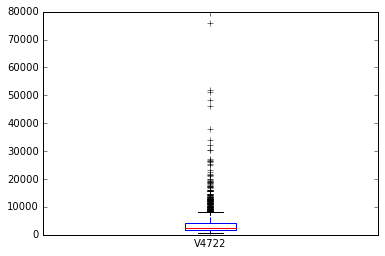

2014 - rendimento mensal domiciliar de pessoas brancas aposentadas e casadas que trabalham


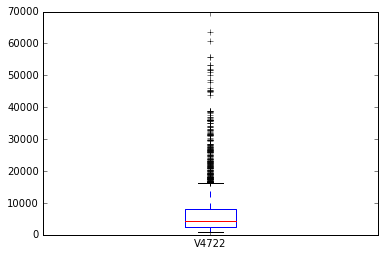

In [236]:
print("2014 - rendimento mensal domiciliar de pessoas pardas aposentadas e casadas que trabalham")
e.plot (kind='box') 
plt.show()
print("2014 - rendimento mensal domiciliar de pessoas brancas aposentadas e casadas que trabalham")
f.plot (kind='box') 
plt.show()

2014 - Histograma que compara a renda domiciliar mensal entre pessoas aposentados, pardas e casadas(Vermelho) e pessoas aposentadasque trabalham, brancas e casadas que trabalham(vermelho):


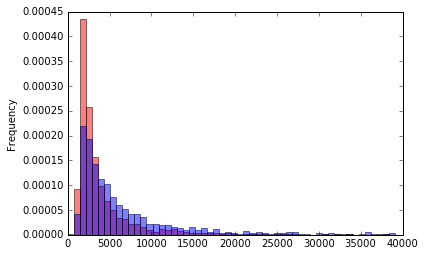

In [237]:
faixa3 = np.arange(0, 40000 , 724)
variávelCat3 = pd.cut(dados.RENDIMENTO_MENSAL[(dados.RENDIMENTO_MENSAL <999999999999)&(dados.CASADO=='Casado') & (dados.APOSENTADO == 'Aposentado') & (dados.COR_RACA == 'Pardos') & (dados.TRABALHO== 'Sim')], faixa3) 
variávelCat3.value_counts()
faixa4 = np.arange(0, 40000, 724)
variávelCat4 = pd.cut(dados.RENDIMENTO_MENSAL[(dados.RENDIMENTO_MENSAL <999999999999)&(dados.CASADO=='Casado') & (dados.APOSENTADO == 'Aposentado') & (dados.COR_RACA == 'Brancos') & (dados.TRABALHO== 'Sim')], faixa4) 
variávelCat4.value_counts()
print("2014 - Histograma que compara a renda domiciliar mensal entre pessoas aposentados, pardas e casadas(Vermelho) e pessoas aposentadasque trabalham, brancas e casadas que trabalham(vermelho):")
plot = dados.RENDIMENTO_MENSAL[(dados.RENDIMENTO_MENSAL <999999999999)&(dados.CASADO=='Casado') & (dados.APOSENTADO == 'Aposentado') & (dados.COR_RACA == 'Pardos') & (dados.TRABALHO== 'Sim')].plot.hist(bins = faixa3, normed =1, alpha = 0.5, color = 'r')
plot = dados.RENDIMENTO_MENSAL[(dados.RENDIMENTO_MENSAL <999999999999)&(dados.CASADO=='Casado') & (dados.APOSENTADO == 'Aposentado') & (dados.COR_RACA == 'Brancos')& (dados.TRABALHO== 'Sim')].plot.hist(bins = faixa4, normed =1, alpha = 0.5, color = 'b')
plt.show()

In [238]:
print("2014 - idade de pessoas aposentados, casadas e trabalham")
i = dados.IDADE[(dados.CASADO=='Casado') & (dados.APOSENTADO =='Aposentado') & (dados.TRABALHO== 'Sim')]
print(i.describe())
print()
print("2014 - idade de pessoas aposentadas, casadas e não trabalham")
j = dados.IDADE[(dados.CASADO=='Casado') & (dados.APOSENTADO =='Aposentado') & (dados.TRABALHO== 'Não')]
print(j.describe())
print()

2014 - idade de pessoas aposentados, casadas e trabalham
count    6004.000000
mean       63.568288
std         7.892065
min        22.000000
25%        59.000000
50%        63.000000
75%        68.000000
max       103.000000
Name: V8005, dtype: float64

2014 - idade de pessoas aposentadas, casadas e não trabalham
count    17478.000000
mean        66.897128
std          9.734165
min         18.000000
25%         61.000000
50%         67.000000
75%         73.000000
max        101.000000
Name: V8005, dtype: float64



2014 - Histograma que compara a frequência de faixa de idade entre pessoas aposentados, que trabalham (Vermelho) e pessoas aposentadas  casadas que não trabalham(Azul):


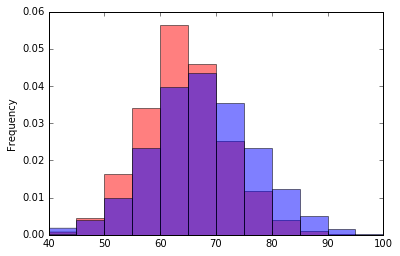

In [239]:
faixa5 = np.arange(40,103, 5)
variávelCat5 = pd.cut(dados.IDADE[(dados.CASADO=='Casado') & (dados.APOSENTADO == 'Aposentado') & (dados.TRABALHO== 'Sim')], faixa5) 
variávelCat5.value_counts()
faixa6 = np.arange(40,101, 5)
variávelCat6 = pd.cut(dados.IDADE[(dados.CASADO=='Casado') & (dados.APOSENTADO == 'Aposentado') & (dados.TRABALHO== 'Não')], faixa6) 
variávelCat6.value_counts()
print("2014 - Histograma que compara a frequência de faixa de idade entre pessoas aposentados, que trabalham (Vermelho) e pessoas aposentadas  casadas que não trabalham(Azul):")
plot = dados.IDADE[(dados.CASADO=='Casado') & (dados.APOSENTADO == 'Aposentado') & (dados.TRABALHO== 'Sim')].plot.hist(bins = faixa5, normed =1, alpha = 0.5, color = 'r')
plot = dados.IDADE[(dados.CASADO=='Casado') & (dados.APOSENTADO == 'Aposentado') & (dados.TRABALHO== 'Não')].plot.hist(bins = faixa6, normed =1, alpha = 0.5, color = 'b')

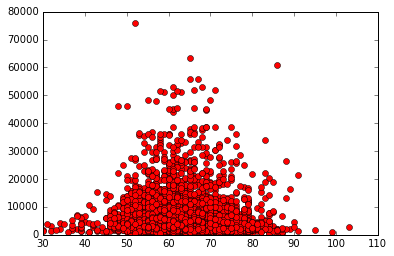

In [243]:
print("Gráfico da idade dos aposentados que trabalham pela renda deles")
plt.plot(dados.IDADE[(dados.RENDIMENTO_MENSAL <999999999999) & (dados.CASADO=='Casado') & (dados.APOSENTADO == 'Aposentado') & (dados.TRABALHO== 'Sim')] , dados.RENDIMENTO_MENSAL[(dados.RENDIMENTO_MENSAL <999999999999) & (dados.CASADO=='Casado') & (dados.APOSENTADO == 'Aposentado') & (dados.TRABALHO== 'Sim')],'ro')

Gráfico da idade dos aposentados que não trabalham pela renda deles


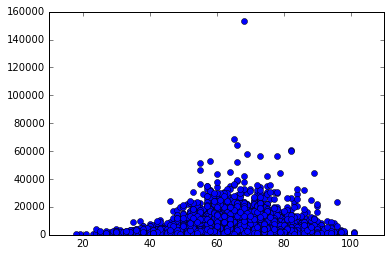

In [246]:
print("Gráfico da idade dos aposentados que não trabalham pela renda deles")
plt.plot(dados.IDADE[(dados.RENDIMENTO_MENSAL <999999999999) & (dados.CASADO=='Casado') & (dados.APOSENTADO == 'Aposentado') & (dados.TRABALHO== 'Não')] , dados.RENDIMENTO_MENSAL[(dados.RENDIMENTO_MENSAL <999999999999) & (dados.CASADO=='Casado') & (dados.APOSENTADO == 'Aposentado') & (dados.TRABALHO== 'Não')],'bo')


Gráfico da idade dos aposentados homens que trabalham pela renda deles


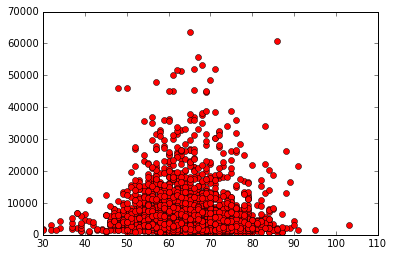

In [251]:
print("Gráfico da idade dos aposentados homens que trabalham pela renda deles")
plt.plot(dados.IDADE[(dados.RENDIMENTO_MENSAL <999999999999) & (dados.CASADO=='Casado') & (dados.APOSENTADO == 'Aposentado') & (dados.TRABALHO== 'Sim') &(dados.SEXO=='Homens')] , dados.RENDIMENTO_MENSAL[(dados.RENDIMENTO_MENSAL <999999999999) & (dados.CASADO=='Casado') & (dados.APOSENTADO == 'Aposentado') & (dados.TRABALHO== 'Sim')&(dados.SEXO=='Homens')],'ro')

Gráfico da idade dos aposentadas mulheres trabalham pela renda deles


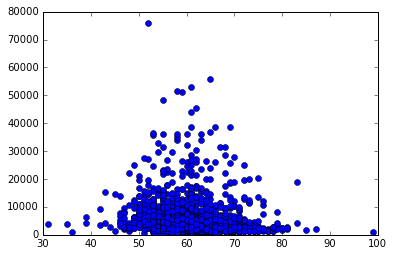

In [252]:
print("Gráfico da idade dos aposentadas mulheres trabalham pela renda deles")
plt.plot(dados.IDADE[(dados.RENDIMENTO_MENSAL <999999999999) & (dados.CASADO=='Casado') & (dados.APOSENTADO == 'Aposentado') & (dados.TRABALHO== 'Sim') &(dados.SEXO=='Mulheres')] , dados.RENDIMENTO_MENSAL[(dados.RENDIMENTO_MENSAL <999999999999) & (dados.CASADO=='Casado') & (dados.APOSENTADO == 'Aposentado') & (dados.TRABALHO== 'Sim')&(dados.SEXO=='Mulheres')],'bo')

Gráfico da idade de pessoas aposentadas brancas que trabalham pela renda delas


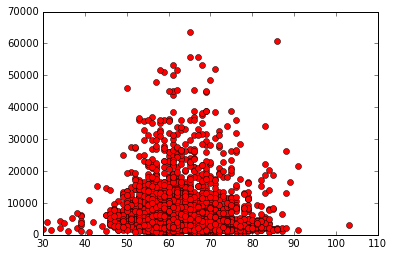

In [254]:
print("Gráfico da idade de pessoas aposentadas brancas que trabalham pela renda delas")
plt.plot(dados.IDADE[(dados.RENDIMENTO_MENSAL <999999999999) & (dados.CASADO=='Casado') & (dados.APOSENTADO == 'Aposentado') & (dados.TRABALHO== 'Sim') &(dados.COR_RACA=='Brancos')] , dados.RENDIMENTO_MENSAL[(dados.RENDIMENTO_MENSAL <999999999999) & (dados.CASADO=='Casado') & (dados.APOSENTADO == 'Aposentado') & (dados.TRABALHO== 'Sim')&(dados.COR_RACA=='Brancos')],'ro')

Gráfico da idade de pessoas aposentadas brancas que trabalham pela renda delas


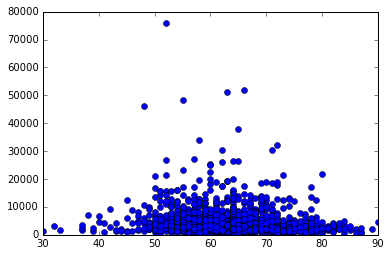

In [255]:
print("Gráfico da idade de pessoas aposentadas brancas que trabalham pela renda delas")
plt.plot(dados.IDADE[(dados.RENDIMENTO_MENSAL <999999999999) & (dados.CASADO=='Casado') & (dados.APOSENTADO == 'Aposentado') & (dados.TRABALHO== 'Sim') &(dados.COR_RACA=='Pardos')] , dados.RENDIMENTO_MENSAL[(dados.RENDIMENTO_MENSAL <999999999999) & (dados.CASADO=='Casado') & (dados.APOSENTADO == 'Aposentado') & (dados.TRABALHO== 'Sim')&(dados.COR_RACA=='Pardos')],'bo')

___
## Conclusão 

Apartir da análisxe feita anteriormente, e considerando as variáveis indicadas à cima, pode-se concluir que os aposentados que trabalham apesar de serem menos frequentes para rendas domiciliares baixas, são maioria quando se trata de rendas mais altas. Já na comparação entre homens e mulheres aposentados que trabalham, foi possível descobrir que eles não apresentam uma grande diferença entre eles. Para o caso da comparação entre pardos e brancos que são aposentados e trabalham, pode-se dizer que apesar de serem menos frequentes para rendas domiciliares baixas,as pessoas brancas são maioria quando se trata de rendas mais altas. Além disso quando o tema é idade, é possível dizer que os aposentados que trabalham são em geral mais jóvens do que os que não trabalham. Como conclusão final, ao analisarmos o gráfico de dispersão de renda por idade dos que trabalham e dos que não trabalham, podemos dizer que: 

## Fontes

http://www.fee.rs.gov.br/servicos/atualizacao-valores/?ano=1992&mes=janeiro&valor=1
http://g1.globo.com/economia/noticia/2015/07/idade-minima-para-se-aposentar-vai-subir-no-mundo-veja-mudancas.html
http://www.pstu.org.br/node/21306